<a href="https://colab.research.google.com/github/AlessandroMessori/ANN_Challenge_1/blob/main/Standard_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
%cd /gdrive/MyDrive/ANN&DL/Challenge

/gdrive/MyDrive/ANN&DL/Challenge


In [4]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.7.0


In [5]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [9]:
dataset_dir = 'training'
labels = ['Apple','Blueberry','Cherry','Corn','Grape','Orange','Peach','Pepper','Potato','Raspberry','Soybean','Squash','Strawberry','Tomato']

In [7]:
batch_size = 32
img_height = 256
img_width = 256
input_shape = (256,256,3)
epochs = 200

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode= 'categorical')

Found 17728 files belonging to 14 classes.
Using 14183 files for training.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode = 'categorical')

Found 17728 files belonging to 14 classes.
Using 3545 files for validation.


In [11]:
def build_standard_model (input_shape):
  input_layer = tfkl.Input(shape=input_shape, name='Input')
  resize_layer = tfkl.Resizing(256, 256)(input_layer)
  rescaling_layer = tfkl.Rescaling(1./255)(resize_layer)

  conv1 = tfkl.Conv2D(
        filters=16,
        kernel_size=(12, 12),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Conv1'
    )(rescaling_layer)
  pool1 = tfkl.MaxPooling2D(
        pool_size = (8, 8),
        name='Pool1'
    )(conv1)

  conv2 = tfkl.Conv2D(
        filters=32,
        kernel_size=(12, 12),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Conv2'
    )(pool1)
  pool2 = tfkl.MaxPooling2D(
        pool_size = (4, 4),
        name='Pool2'
    )(conv2)

  conv3 = tfkl.Conv2D(
        filters=64,
        kernel_size=(12, 12),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Conv3'
    )(pool2)
  pool3 = tfkl.MaxPooling2D(
        pool_size = (2, 2),
        name='Pool3'
    )(conv3)

  flattening_layer = tfkl.Flatten(name='Flatten')(pool3)
  flattening_layer = tfkl.Dropout(0.3, seed=seed)(flattening_layer)
  classifier_layer = tfkl.Dense(units=128, name='Classifier', activation='relu')(flattening_layer)
  classifier_layer = tfkl.Dropout(0.3, seed=seed)(classifier_layer)
  output_layer = tfkl.Dense(units=14, activation='softmax', name='Output')(classifier_layer)

  # Connect input and output through the Model class
  model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

  # Compile the model
  model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

  # Return the model
  return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 resizing_1 (Resizing)       (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 Conv1 (Conv2D)              (None, 256, 256, 16)      6928      
                                                                 
 Pool1 (MaxPooling2D)        (None, 32, 32, 16)        0         
                                                                 
 Conv2 (Conv2D)              (None, 32, 32, 32)        73760     
                                                                 
 Pool2 (MaxPooling2D)        (None, 8, 8, 32)          0     

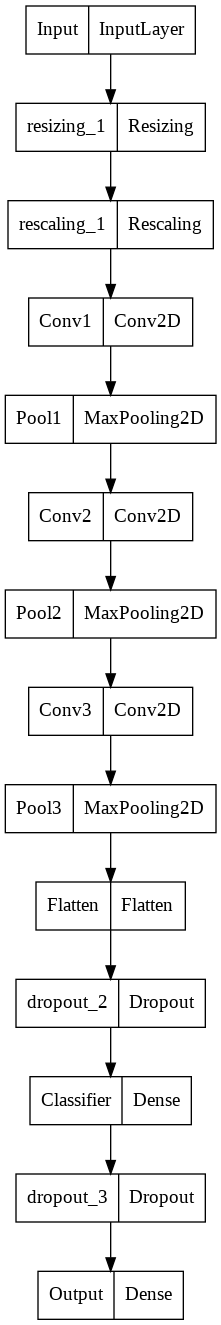

In [18]:
model = build_standard_model(input_shape)
model.summary()
tfk.utils.plot_model(model)

In [13]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [19]:
# Train the model
history = model.fit(
    train_ds,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = val_ds,
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)]
).history

Epoch 1/200
444/444 [==============================] - 4525s 10s/step - loss: 1.2808 - accuracy: 0.6136 - val_loss: 0.8338 - val_accuracy: 0.7439
Epoch 2/200
444/444 [==============================] - 66s 147ms/step - loss: 0.6441 - accuracy: 0.8019 - val_loss: 0.4914 - val_accuracy: 0.8434
Epoch 3/200
444/444 [==============================] - 66s 147ms/step - loss: 0.4476 - accuracy: 0.8564 - val_loss: 0.3893 - val_accuracy: 0.8790
Epoch 4/200
444/444 [==============================] - 66s 147ms/step - loss: 0.3199 - accuracy: 0.8959 - val_loss: 0.4133 - val_accuracy: 0.8722
Epoch 5/200
444/444 [==============================] - 66s 147ms/step - loss: 0.2638 - accuracy: 0.9158 - val_loss: 0.3522 - val_accuracy: 0.8942
Epoch 6/200
444/444 [==============================] - 66s 148ms/step - loss: 0.1970 - accuracy: 0.9360 - val_loss: 0.3384 - val_accuracy: 0.8959
Epoch 7/200
444/444 [==============================] - 66s 147ms/step - loss: 0.1753 - accuracy: 0.9437 - val_loss: 0.3685 -

In [20]:
model.save('Standard_Model')

INFO:tensorflow:Assets written to: Standard_Model/assets


INFO:tensorflow:Assets written to: Standard_Model/assets


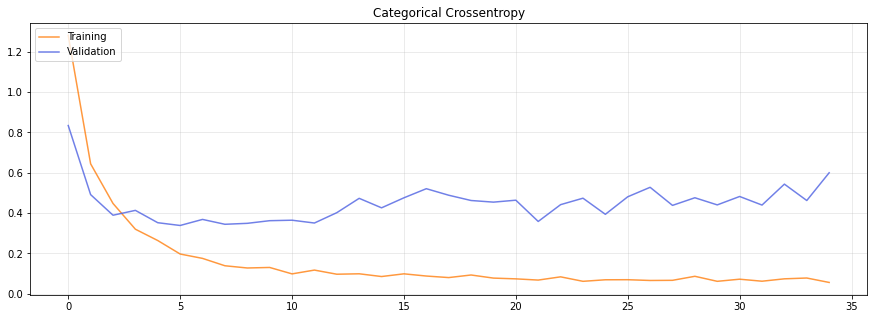

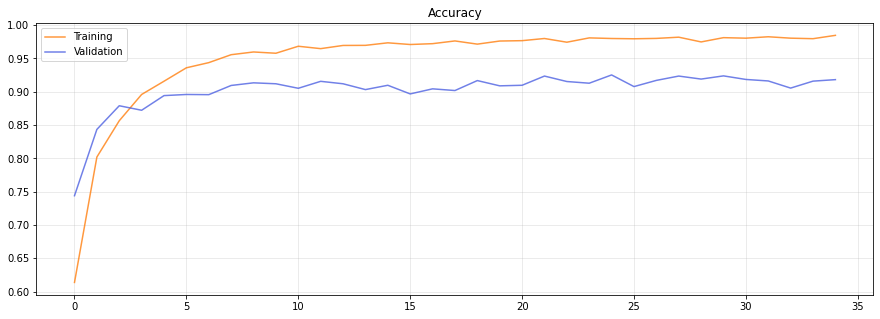

In [21]:
# Plot the training
plt.figure(figsize=(15,5))
plt.plot(history['loss'], label='Training', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation', alpha=.8, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=.3)

plt.figure(figsize=(15,5))
plt.plot(history['accuracy'], label='Training', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation', alpha=.8, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()

In [24]:
max(history['val_accuracy'])

0.9252468347549438